In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
indices = ['^GSPC', '^DJI', '^FTSE', '^IXIC', '^RUT']
equities = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']


In [3]:
start_date = '2010-01-01'
end_date = '2023-05-01'

In [4]:
indices_data = yf.download(indices, start=start_date, end=end_date)['Adj Close']
equities_data = yf.download(equities, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [5]:
indices_returns = indices_data.pct_change().dropna()
equities_returns = equities_data.pct_change().dropna()

In [6]:
indices_cumulative_returns = (1 + indices_returns).cumprod()
equities_cumulative_returns = (1 + equities_returns).cumprod()


In [7]:
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    previous_peaks = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - previous_peaks) / previous_peaks
    max_drawdown = drawdowns.min()
    return max_drawdown
indices_max_drawdowns = indices_returns.groupby(indices_returns.index.year).apply(calculate_max_drawdown)
equities_max_drawdowns = equities_returns.groupby(equities_returns.index.year).apply(calculate_max_drawdown)


In [8]:
risk_free_rate = 0.02 
indices_sharpe_ratio = (indices_returns.mean() - risk_free_rate) / indices_returns.std()
equities_sharpe_ratio = (equities_returns.mean() - risk_free_rate) / equities_returns.std()


In [9]:
downside_threshold = 0 
indices_downside_returns = indices_returns[indices_returns < downside_threshold]
equities_downside_returns = equities_returns[equities_returns < downside_threshold]
indices_sortino_ratio = (indices_returns.mean() - risk_free_rate) / indices_downside_returns.std()
equities_sortino_ratio = (equities_returns.mean() - risk_free_rate) / equities_downside_returns.std()


In [10]:
print("Index Daily Returns:")
print(indices_returns.head())
print("\nIndex Cumulative Returns:")
print(indices_cumulative_returns.tail())
print("\nIndex Max Drawdowns:")
print(indices_max_drawdowns)
print("\nIndex Sharpe Ratios:")
print(indices_sharpe_ratio)
print("\nIndex Sortino Ratios:")
print(indices_sortino_ratio)
print("\nEquity Daily Returns:")
print(equities_returns.head())
print("\nEquity Cumulative Returns:")
print(equities_cumulative_returns.tail())
print("\nEquity Max Drawdowns:")
print(equities_max_drawdowns)
print("\nEquity Sharpe Ratios:")
print(equities_sharpe_ratio)
print("\nEquity Sortino Ratios:")
print(equities_sortino_ratio)


Index Daily Returns:
                ^DJI     ^FTSE     ^GSPC     ^IXIC      ^RUT
Date                                                        
2010-01-05 -0.001128  0.004036  0.003116  0.000126 -0.002515
2010-01-06  0.000157  0.001358  0.000546 -0.003300 -0.000846
2010-01-07  0.003138 -0.000597  0.004001 -0.000452  0.006301
2010-01-08  0.001068  0.001357  0.002882  0.007443  0.004034
2010-01-11  0.004313  0.000705  0.001747 -0.002054 -0.000884

Index Cumulative Returns:
                ^DJI     ^FTSE     ^GSPC     ^IXIC      ^RUT
Date                                                        
2023-04-24  3.200636  1.438503  3.651436  5.214476  2.794673
2023-04-25  3.168080  1.434667  3.593703  5.111358  2.727621
2023-04-26  3.146447  1.427668  3.579899  5.135266  2.703343
2023-04-27  3.195983  1.423850  3.649944  5.259979  2.735854
2023-04-28  3.221683  1.430940  3.680068  5.296515  2.763615

Index Max Drawdowns:
          ^DJI     ^FTSE     ^GSPC     ^IXIC      ^RUT
Date                 

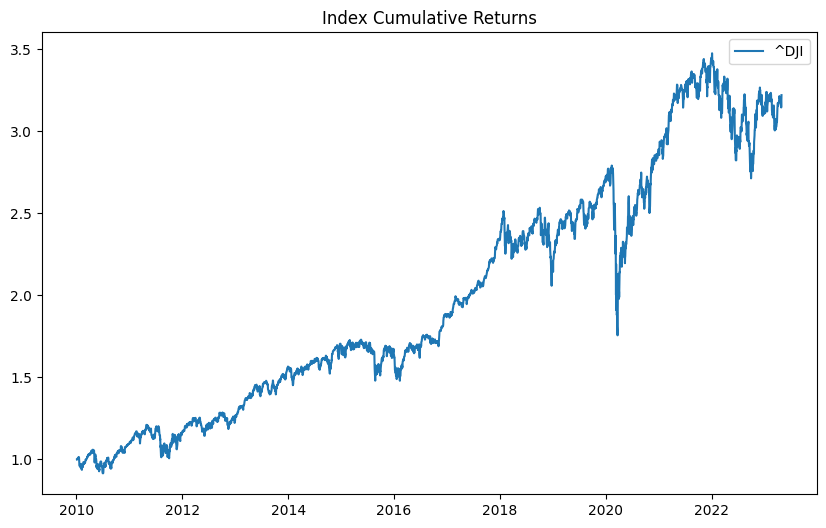

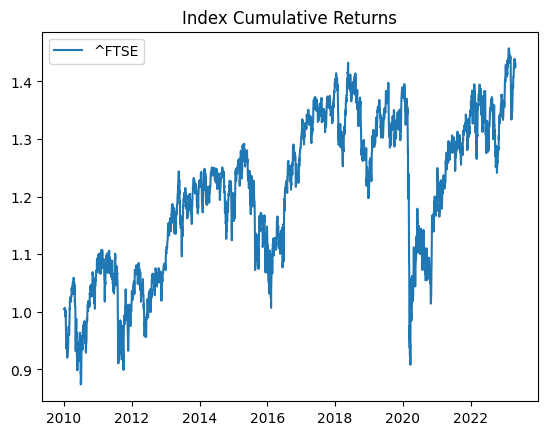

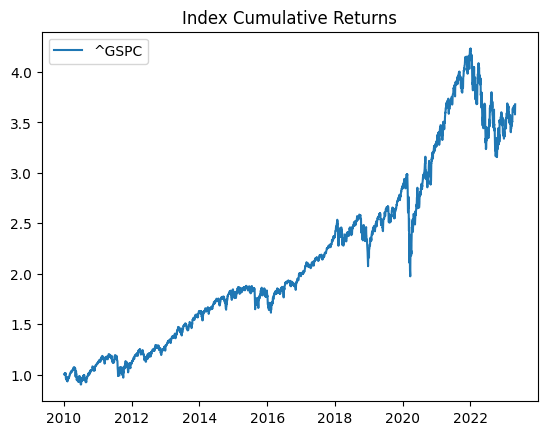

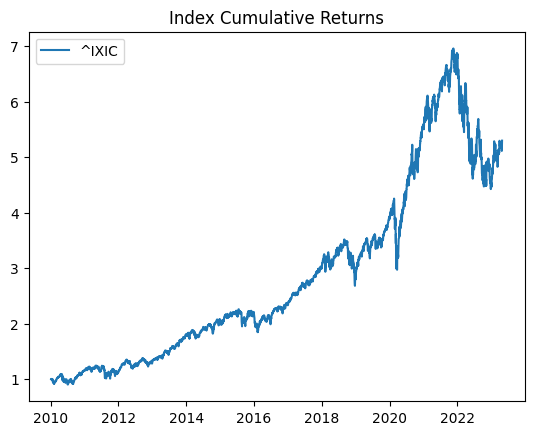

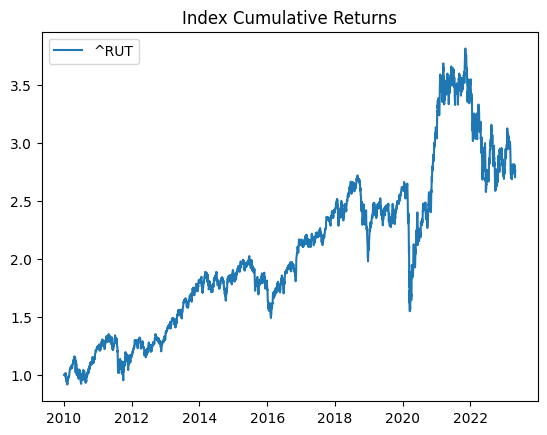

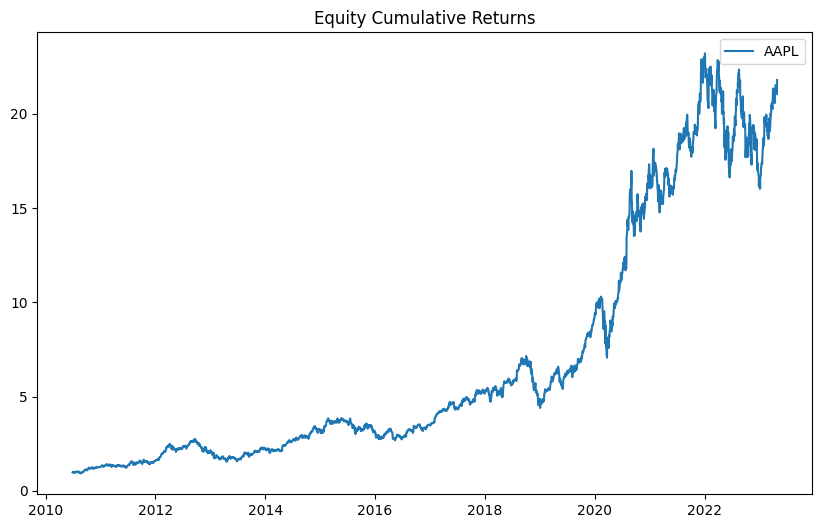

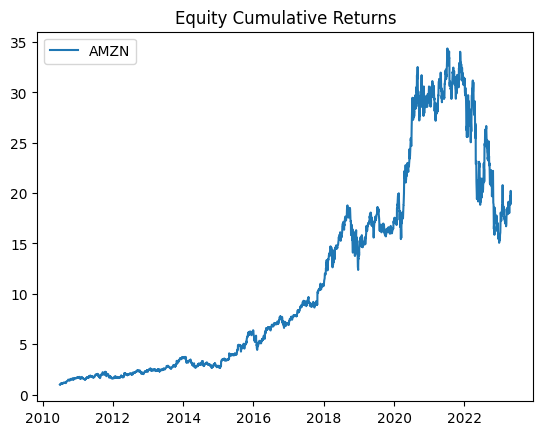

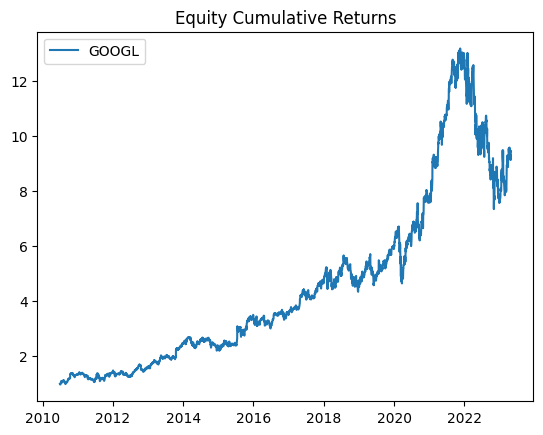

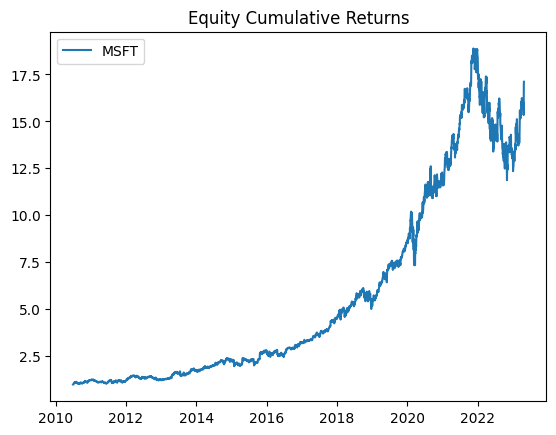

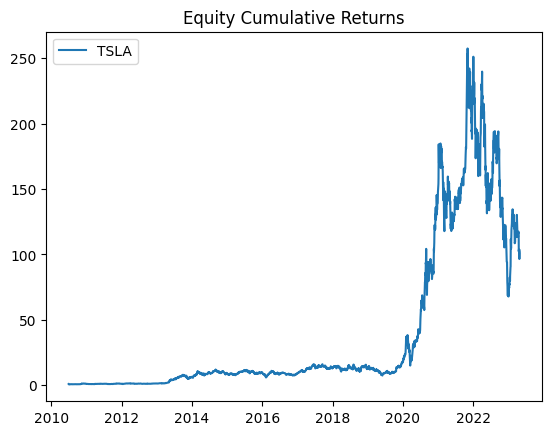

In [11]:
plt.figure(figsize=(10, 6))
for index in indices_cumulative_returns.columns:
    plt.plot(indices_cumulative_returns.index, indices_cumulative_returns[index], label=index)
    plt.title('Index Cumulative Returns')
    plt.legend()
    plt.show()

plt.figure(figsize=(10, 6))
for equity in equities_cumulative_returns.columns:
    plt.plot(equities_cumulative_returns.index, equities_cumulative_returns[equity], label=equity)
    plt.title('Equity Cumulative Returns')
    plt.legend()
    plt.show()
